In [4]:
## We don't want to output too many images to one directory, so we're going to first figure out the length

import subprocess
import re

videoFile = "/home/ubuntu/SoftRobotRepresentation/Data/recordingRight2.mp4"

def getLength(filename):
  result = subprocess.Popen(["ffprobe", filename],
    stdout = subprocess.PIPE, stderr = subprocess.STDOUT)
  return [x for x in result.stdout.readlines() if "Duration" in x or "fps" in x]

# duration
mainStr = getLength(videoFile)
lenStr = mainStr[0]
lenStr = re.split(' | Duration\:|,',lenStr)
dur = lenStr[3]

# fps
fpsStr = mainStr[1]
matches = re.match('.*, ([0-9]+) fps,.*', fpsStr)
fps = int(matches.group(1))

HHMMSSFF = [int(i) for i in re.split('\:|\.',dur)]
numFrames = (HHMMSSFF[0]*60*60+HHMMSSFF[1]*60+HHMMSSFF[2])*fps


print "videoFile=" + videoFile
print "fps=" + str(fps)
print "duration="+str(dur)
print "numFrames="+str(numFrames)

videoFile=/home/ubuntu/SoftRobotRepresentation/Data/recordingRight2.mp4
fps=20
duration=00:37:25.20
numFrames=44900


In [ ]:
import math
import os
import shutil
import ffmpy
imagesPerDir = 500

outDir = '/home/ubuntu/SoftRobotRepresentation/Data/Recording3/'
# cropInfo = '918:458:323:45' # for recording1
# cropInfo = '910:1308:370:20' # for recording2
# cropInfo = '1188:1102:488:78' # for recording3
# cropInfo = '452:675:384:20' # for recordingOverhead
cropInfo = '894:609:389:14' # for recordingOverhead

numDirs = int(math.ceil(numFrames/imagesPerDir))
for i in range(numDirs):
    startFrame = i*imagesPerDir
    endFrame = startFrame+numFrames-1
    
    rem = startFrame
    hours = math.floor(rem/(60*60*fps))
    rem = rem-hours*60*60*fps
    minutes = math.floor(rem/(60*fps))
    rem = rem-minutes*60*fps
    seconds = math.floor(rem/fps)
    rem = rem-seconds*fps
    ms = rem/fps
    
    time = imagesPerDir/fps
    
    startString = "%02d:%02d:%02d.%d" % (hours,minutes,seconds,int(ms*100))
    print "startString="+startString
    
    directory = outDir+str(i)
    outString = directory+"/%06d.jpg"
    print 'outString='+outString
    
    dirExists = os.path.isdir(directory)
    if dirExists:
        shutil.rmtree(directory)
    
    os.makedirs(directory)
    
    filterString = 'crop='+cropInfo+', scale=256:256'
    print 'filterString='+filterString
    
    
    ff = ffmpy.FFmpeg(
            inputs={videoFile: ['-ss', startString]},
            outputs={outString: ['-vf', filterString,
                                 '-start_number', str(startFrame),
                                 '-t', str(time),
                                 '-qscale:v', '8']}
        )
    ff.run()
    
#     print "startFrame=%d,hours=%d,minutes=%d,seconds=%d,ms=%f" % (startFrame,hours,minutes,seconds,ms)
    
    

In [5]:
import math
import os
import shutil
import ffmpy

outDirTrain = '/home/ubuntu/SoftRobotRepresentation/Data/Training/0'
outDirVal = '/home/ubuntu/SoftRobotRepresentation/Data/Validation/0'
# cropInfo = '918:458:323:45' # for recording1
# cropInfo = '910:1308:370:20' # for recording2
# cropInfo = '1188:1102:488:78' # for recording3
# cropInfo = '452:675:384:20' # for recording3
cropInfo = '894:609:389:14' # for recordingOverhead


valFrac = 0.3
numFramesVal = round(numFrames*valFrac)
numFramesTrain = numFrames-numFramesVal

timeTrain = numFramesTrain/fps

startFrameTrain = len([e for e in os.listdir(outDirTrain)])
    
filterString = 'crop='+cropInfo+', scale=256:256'
print 'filterString='+filterString
outString = outDirTrain+"/%06d.jpg"

print 'trainingStartNumber='+str(startFrameTrain)

ff = ffmpy.FFmpeg(
        inputs={videoFile: []},
        outputs={outString: ['-vf', filterString,
                             '-start_number', str(startFrameTrain),
                             '-t', str(timeTrain),
                             '-qscale:v', '6']}
    )
ff.run()



startFrameVal = len([e for e in os.listdir(outDirVal)])

rem = numFramesTrain
hours = math.floor(rem/(60*60*fps))
rem = rem-hours*60*60*fps
minutes = math.floor(rem/(60*fps))
rem = rem-minutes*60*fps
seconds = math.floor(rem/fps)
rem = rem-seconds*fps
ms = rem/fps

timeVal = numFramesVal/fps

startStringVal = "%02d:%02d:%02d.%d" % (hours,minutes,seconds,int(ms*100))
print "startString="+startStringVal
outString = outDirVal+"/%06d.jpg"

print 'valStartNumber='+str(startFrameVal)
    
    
ff = ffmpy.FFmpeg(
        inputs={videoFile: ['-ss', startStringVal]},
        outputs={outString: ['-vf', filterString,
                             '-start_number', str(startFrameVal),
                             '-t', str(timeVal),
                             '-qscale:v', '6']}
    )
ff.run()

filterString=crop=894:609:389:14, scale=256:256
trainingStartNumber=21420
startString=00:26:11.50
valStartNumber=9180


(None, None)

(256, 256, 3)


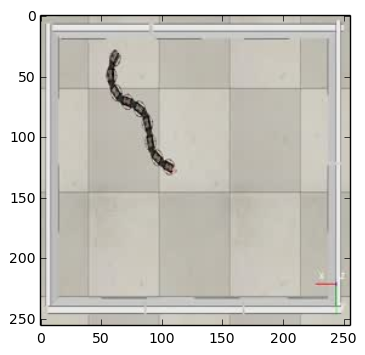

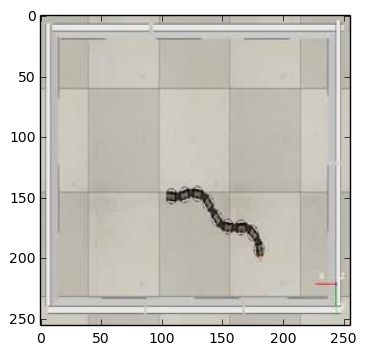

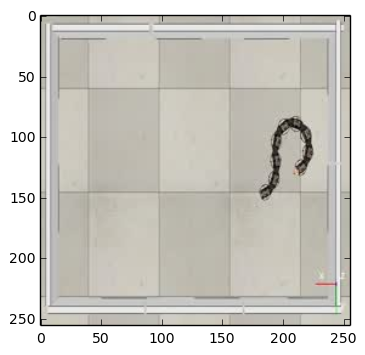

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time
from matplotlib import image

testPath = "/home/ubuntu/SoftRobotRepresentation/Data/Training/0/030000.jpg"
testPath2 = "/home/ubuntu/SoftRobotRepresentation/Data/Training/0/031000.jpg"
testPath3 = "/home/ubuntu/SoftRobotRepresentation/Data/Training/0/032000.jpg"

im =  image.imread(testPath)
print im.shape
plt.figure()
plt.imshow(im)

im3 =  image.imread(testPath3)
plt.figure()
plt.imshow(im3)

im2 =  image.imread(testPath2)
plt.figure()
plt.imshow(im2)